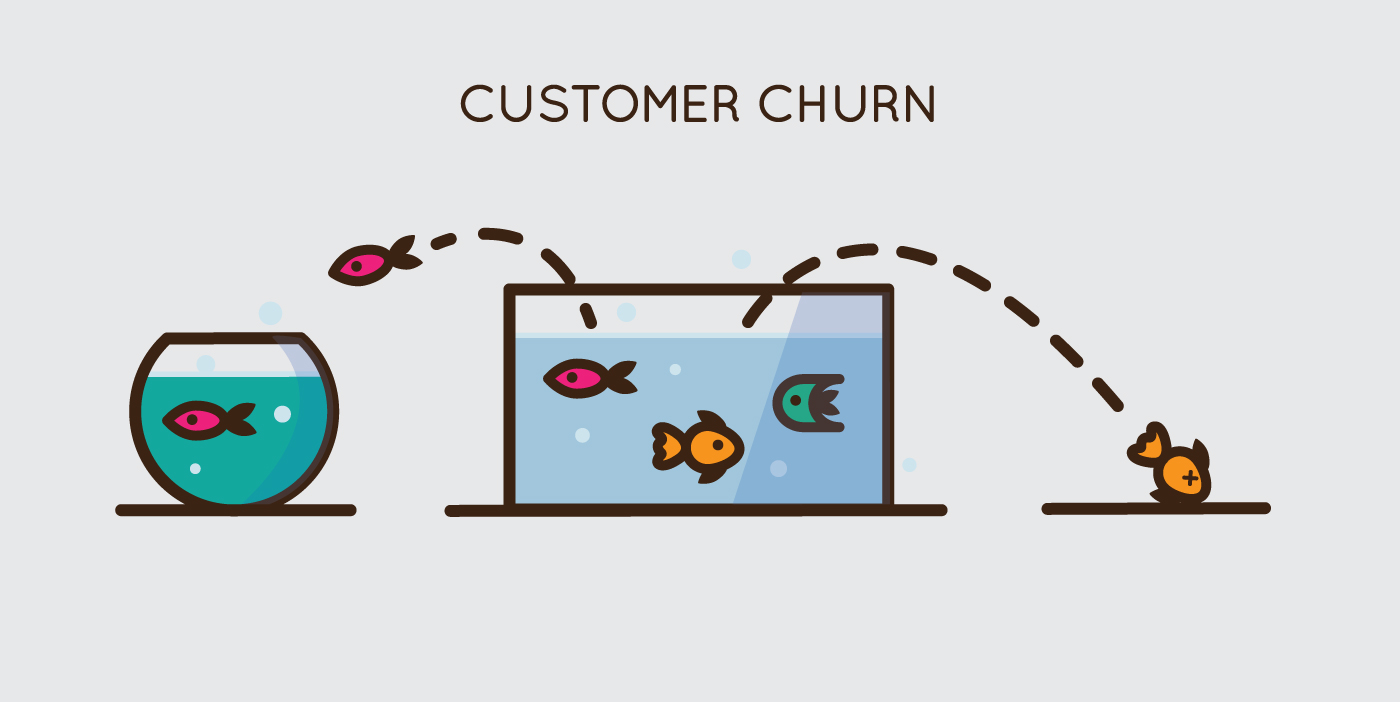

## What Is Customer Churn?

* Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. You can calculate churn rate by dividing the number of customers you lost during that time period by the number of customers you had at the beginning of that time period.

## 5 Reasons Why Customer Retention Is Important
Below you can find 5 reasons why customer retention is important according to dcrstrategies.com:
1. Companies save money on marketing.
2. Repeat purchases from repeat customers means repeat profit.
3. Free word-of-mouth advertising.
4. Retained customers provide valuable feedback.
5. Previous customers will pay premium prices.

In this notebook I will create a model that can accurately predict / classify if a customer is likely to churn.

The dataset that will be used in this analysis will come from the Telco company Challenge on [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn).

telco is a telecommunications company that offers phone and internet services.

In [1]:
# import the library
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# importing the dataset
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# show de dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# total of customers
df.shape

(7043, 21)

the data set contains 7,043 customers and 21 data points on each customer.

In [7]:
# show the datapoints
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [10]:
# Checking missing values and cleaning data if necessary
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [11]:
# Show statistics of the data 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


  From the statistics, we can see that the longest tenure is 72 months, and the maximum monthly charge is 118.75 USD. The minimum monthly charge is about 30.09. The customer can expect to have a monthly charge of about 64.76. The charges are in United States Dollars (USD).

# Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


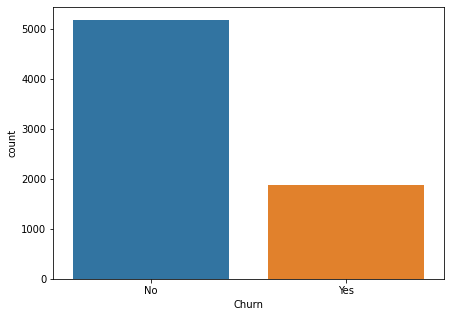

In [23]:
#Visualize the count of customer churn
plt.figure(figsize=(7,5))
sns.countplot(df['Churn'])
plt.show()

In [27]:
#What percentage of customers are leaving ?
retained = df[df.Churn == 'No']
churned = df[df.Churn == 'Yes']
num_retained = retained.shape[0]
num_churned = churned.shape[0]
#Print the percentage of customers that stayed and left
print(round(num_retained / (num_retained + num_churned) * 100, 2) , "% of customers stayed with the company.")
#Print the percentage of customers that stayed and left
print(round(num_churned / (num_retained + num_churned) * 100, 2 ), "% of customers left the company.")

73.46 % of customers stayed with the company.
26.54 % of customers left the company.


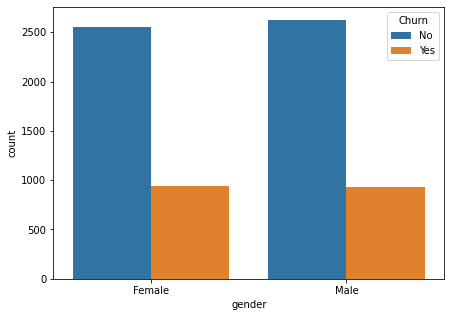

In [29]:
# Visualize the churn count by gender
plt.figure(figsize=(7,5))
sns.countplot(x='gender', hue='Churn',data = df)
plt.show()

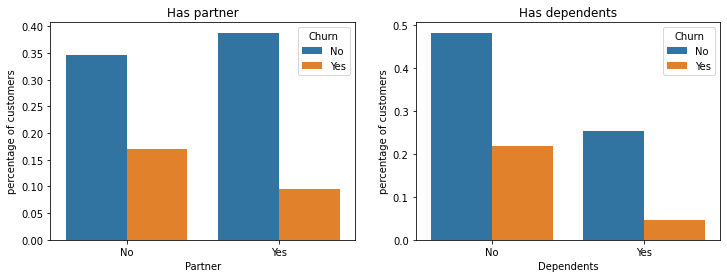

In [32]:
# Define a subplot contained Partner column and Dependets column
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

* Customers that doesn't have partners are more likely to churn
* Customers without dependents are also more likely to churn

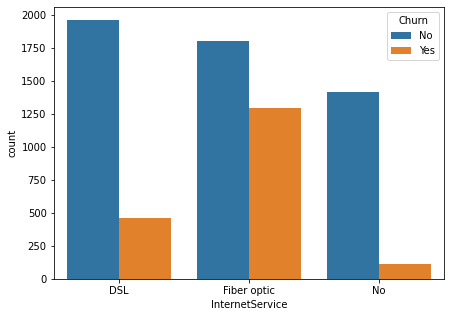

In [30]:
# Visualize the churn count for the internet service
plt.figure(figsize=(7,5))
sns.countplot(x='InternetService', hue='Churn', data = df)
plt.show()

* The chart above is very useful because it shows that most customers that churned had the Fiber optic internet service, and the most customers that were retained had DSL internet service.

* Maybe Telco should only provide DSL as the internet service or stop providing Fiber optics for it’s internet service.

## Numerical features


There are only three numerical columns: tenure, monthly charges and total charges.

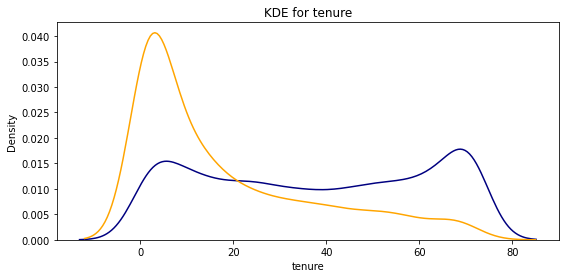

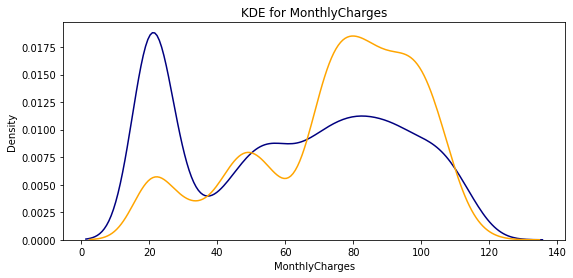

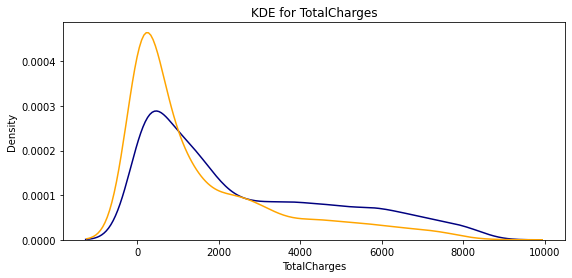

In [39]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:

* Recent clients are more likely to churn

* Clients with higher MonthlyCharges are also more likely to churn

* Tenure and MonthlyCharges are probably important features

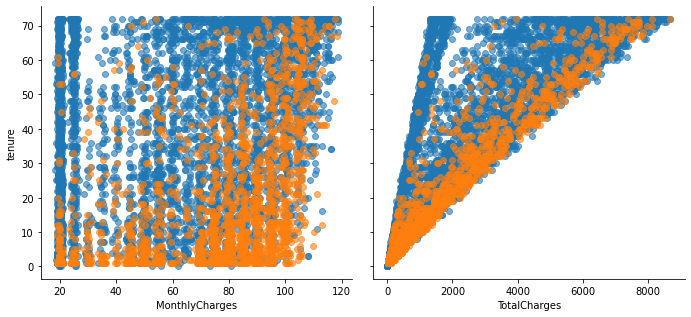

In [40]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

# Data Processing and Cleaning

In [41]:
# remove useless columns
cleaned_df = df.drop(['customerID'], axis = 1)

In [44]:
# Convert non-numeric to numeric using encoders
for column in cleaned_df.columns:
   if cleaned_df[column].dtype == np.number:
      continue
   cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
cleaned_df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [46]:
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,75,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3625,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,537,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3571,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,675,1


In [47]:
# Scale the cleaned data
X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']
# scaling the features
X = StandardScaler().fit_transform(X)

In [56]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now the data is ready to our model.

# Create the Machine Learning Model

In [50]:
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [53]:
models = []
models.append(('Random Forest Clas.', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Clas.', DecisionTreeClassifier()))
models.append(("LightGBM", LGBMClassifier()))
models.append(('Logistic Reg.', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('SVC', SVC()))

In [54]:
# CrossValidation scores
model_names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
    scores.append(score)
    model_names.append(name)
    print(f"Mean of the {name} model scores : {score.mean()}")

Mean of the Random Forest Clas. model scores : 0.7955403771760154
Mean of the KNN model scores : 0.7618860815602837
Mean of the Decision Tree Clas. model scores : 0.7330710025789815
Mean of the LightGBM model scores : 0.7961081560283688
Mean of the Logistic Reg. model scores : 0.8054809397163121
Mean of the XGB model scores : 0.8054785219213411
Mean of the SVC model scores : 0.7990937298517085


Our best models are Logistic Reg (0.805409) and XGB (0.80547)

# 1- Logistic Regression

In [57]:
log = LogisticRegression()
log.fit(X_train, y_train)

log_y_pred = log.predict(X_test)
log_y_pred_train = log.predict(X_train)

In [59]:
log_test_as = metrics.accuracy_score(log_y_pred, y_test)
log_train_as = metrics.accuracy_score(log_y_pred_train, y_train)
print(f"Accuracy score for test data : {log_test_as}")
print(f"Accuracy score for train data : {log_train_as}")

Accuracy score for test data : 0.8168914123491838
Accuracy score for train data : 0.8040468583599574


In [61]:
# classification report
print(metrics.classification_report(log_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1108
           1       0.56      0.69      0.62       301

    accuracy                           0.82      1409
   macro avg       0.73      0.77      0.75      1409
weighted avg       0.83      0.82      0.82      1409



In [62]:
# Confusion Matrix test
metrics.confusion_matrix(log_y_pred, y_test)

array([[943, 165],
       [ 93, 208]])

In [63]:
# Confusion Matrix Train
metrics.confusion_matrix(log_y_pred_train, y_train)

array([[3773,  739],
       [ 365,  757]])

In [64]:
# Roc Curve
y_proba_log = log.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)

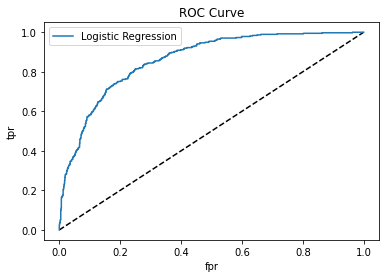

In [65]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [66]:
metrics.roc_auc_score(y_test, y_proba_log)

0.8607282598569461

In [67]:
y_proba_log_train = log.predict_proba(X_train)[:, 1]
metrics.roc_auc_score(y_train, y_proba_log_train)

0.8450079057283092

# 2- XGBoost

In [69]:
xg = XGBClassifier()
xg.fit(X_train, y_train)

y_pred_xg = xg.predict(X_test)

y_pred_xg_train = xg.predict(X_train)

xg_as = metrics.accuracy_score(y_test, y_pred_xg)
xg_as_train = metrics.accuracy_score(y_train, y_pred_xg_train)

print(f"Accuracy score of test data : {xg_as}")
print(f"Accuracy score of train data : {xg_as_train}")

Accuracy score of test data : 0.8041163946061036
Accuracy score of train data : 0.8186013489527867


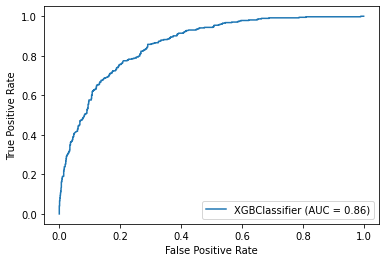

In [71]:
metrics.plot_roc_curve(xg, X_test, y_test);

Overall, the Linear Regression without tunning can provide a best perform to the test data (0.8168%). 

Thanks for reading this notebook I hope its helpful to you all.


[Linkedin](https://www.linkedin.com/in/danilo-felipe-neto-972b45120/)  

[GitHub](https://github.com/danilofneto)

[Medium](https://medium.com/@danilofelipeneto)
